
# Projet d'économétrie

Par Mohamed Al Ani, Davy Bensoussan, Alexandre Brehelin

Mai 2017

### Imports nécessaires

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
from scipy.stats import f
from statsmodels.tsa.adfvalues import mackinnonp, mackinnoncrit
from scipy.stats import normaltest
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.ar_model import AR, ARResults
import warnings
warnings.filterwarnings("ignore")

### Fonctions utiles

#### Régression linéare avec constante 

In [2]:
def OLS(df, variables_explicatives, variable_cible, centrer_reduire=False):
    
    X = df[variables_explicatives]
    X = np.zeros((X.shape[0], X.shape[1]+1))
    X[:,0] = 1
    X[:,1:] = df.ix[:, variables_explicatives]
    
    if centrer_reduire:
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)

    y = df[variable_cible]
    beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    y_pred = np.dot(X, beta)
    return (beta, y_pred, y-y_pred, X)

#### Afficher les coefficients de la régression 

In [3]:
def afficher_var(variables, beta):
    variables = ["constante"]+variables
    for i, item in enumerate(beta):
        print(item, variables[i])

### 1.	Lire le fichier mroz.txt. Ne sélectionner que les observations pour lesquelles la variable wage est strictement positive.

In [116]:
names = [
    'inlf',                    # =1 if in labor force, 1975
    'hours',                   # hours worked, 1975
    'kidslt6',                 # #kids < 6 years
    'kidsge6',                 # #kids 6-18
    'age',                     # woman's age in yrs
    'educ',                    # years of schooling
    'wage',                    # estimated wage from earns., hours
    'repwage',                 # reported wage at interview in 1976
    'hushrs',                  # hours worked by husband, 1975
    'husage',                  # husband's age
    'huseduc',                 # husband's years of schooling
    'huswage',                 # husband's hourly wage, 1975
    'faminc',                  # family income, 1975
    'mtr',                     # fed. marginal tax rate facing woman
    'motheduc',                # mother's years of schooling
    'fatheduc',                # father's years of schooling
    'unem',                    # unem. rate in county of resid.
    'city',                    # =1 if live in SMSA
    'exper',                   # actual labor mkt exper
    'nwifeinc',                # (faminc - wage*hours)/1000
    'lwage',                   # log(wage)
    'expersq',                 # exper^2
]


df = pd.read_csv('swbook1_3e\\textfiles\MROZ.raw', sep='\s+', names=names)
df = df.convert_objects(convert_numeric=True)

df = df[df["wage"]>0]

### 2. Faire les statistiques descriptives du salaire, de l’age et de l’éducation  pour l’ensemble des femmes

In [10]:
df[["wage", "age", "educ"]].describe()

,wage,age,educ
count,428.000000,428.000000,428.000000
mean,4.177682,41.971963,12.658879
std,3.310282,7.721084,2.285376
min,0.128200,30.000000,5.000000
25%,2.262600,35.000000,12.000000
50%,3.481900,42.000000,12.000000
75%,4.970750,47.250000,14.000000
max,25.000000,60.000000,17.000000


### Salaire du mari supérieur à la médiane de l'échantillon

In [11]:
df[df["huswage"]>df["huswage"].median()][["wage", "age", "educ"]].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,4.896822,42.275701,13.242991
std,4.041606,7.388843,2.359045
min,0.161600,30.000000,5.000000
25%,2.513850,36.000000,12.000000
50%,3.846400,43.000000,12.000000
75%,5.854125,48.000000,16.000000
max,25.000000,59.000000,17.000000


### Salaire du mari inférieur à la médiane de l'échantillon

In [12]:
df[df["huswage"]<df["huswage"].median()][["wage", "age", "educ"]].describe()

,wage,age,educ
count,214.000000,214.000000,214.000000
mean,3.458541,41.668224,12.074766
std,2.143274,8.045482,2.054200
min,0.128200,30.000000,6.000000
25%,2.117275,35.000000,12.000000
50%,2.971800,41.000000,12.000000
75%,4.393800,47.000000,12.000000
max,18.267000,60.000000,17.000000


### 3. 

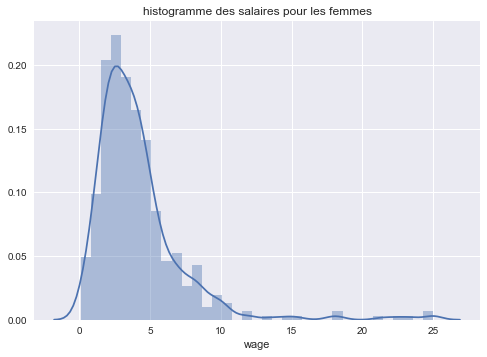

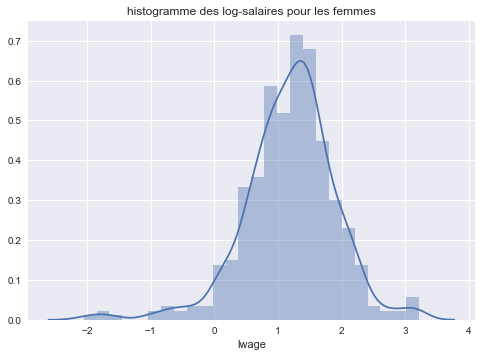

In [13]:
sns.distplot(df["wage"])
plt.title("histogramme des salaires pour les femmes")
plt.show()
sns.distplot(df["lwage"])
plt.title("histogramme des log-salaires pour les femmes")
plt.show()

### 4. Calculer les corrélations motheduc et fatheduc. Commentez. Il y a-t-il un problème de multicollinéarité si l'on utilise ces variables comme variables explicatives ?

In [14]:
from scipy.stats import spearmanr

print(np.corrcoef(df["motheduc"], df["fatheduc"]))
spearmanr(df["motheduc"], df["fatheduc"])

[[ 1.          0.55406322]
 [ 0.55406322  1.        ]]


SpearmanrResult(correlation=0.55073278223958799, pvalue=2.5800056955164742e-35)

### 5.

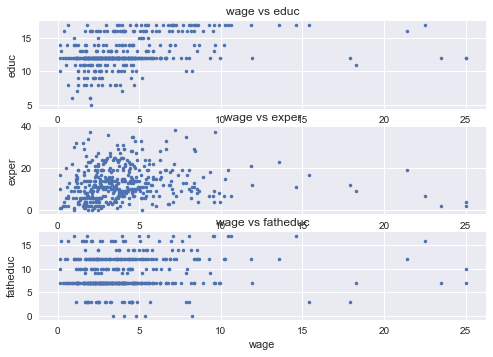

In [15]:
fx, axarr = plt.subplots(3, 1)
axarr[0].plot(df["wage"], df["educ"], '.')
axarr[0].set_title('wage vs educ')
axarr[0].set_xlabel("wage")
axarr[0].set_ylabel("educ")

axarr[1].plot(df["wage"], df["exper"], '.')
axarr[1].set_title('wage vs exper')
axarr[1].set_xlabel("wage")
axarr[1].set_ylabel("exper")

axarr[2].plot(df["wage"], df["fatheduc"], '.')
axarr[2].set_title('wage vs fatheduc')
axarr[2].set_xlabel("wage")
axarr[2].set_ylabel("fatheduc")



plt.show()

### 6. Quelle est l'hypothèse fondamentale qui garanti des estimateurs non biaisés ? Expliquer le biais de variable omise

C'est la non-corrélation entre les variables explicatives et l'erreur. L'hypothèse permet de s'assurer d'avoir un estimateur sans biais : 

Hyputhèse : 
$$ E(X'u)=0 $$
$$ E(\hat{\beta}) = E(\beta) + (x'x)^{-1} E(X'u)$$

Si l'hypothèse n'est pas respectée
$$E(\hat{\beta}) \ne E(\beta)$$
Donc estimateur biaisé

### 7.	Faire la régression de wage en utilisant les variables explicatives un constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Commentez l'histogramme des résidus. 

In [16]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
beta_wage, y_pred_wage, res_wage, X_wage = OLS(df, variables_explicatives=variables, variable_cible="wage")

In [17]:
afficher_var(variables=variables, beta=beta_wage)

-2.40345399155 constante
0.369752029505 city
0.460047701259 educ
0.0238199479511 exper
0.0152447935763 nwifeinc
0.0361731913893 kidslt6
-0.0618909096857 kidsge6


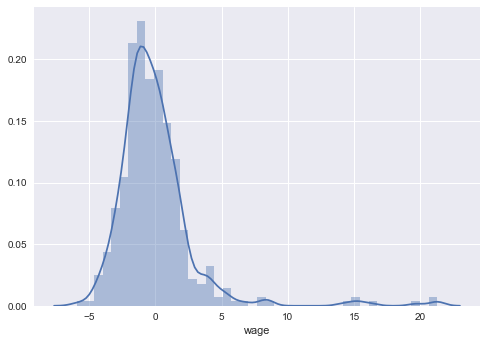

In [18]:
sns.distplot(res_wage)
plt.show()

Les résidus ne semblent pas suivre une loi normale centrée. On ne respecte pas les hypothèses du MCO.

In [19]:
normaltest(res_wage)

NormaltestResult(statistic=345.82470863763109, pvalue=8.0374570731789066e-76)

### 8.	Faire la régrssion de lwage sur une constante, city, educ, exper, nwifeinc, kidslt6, kidsgt6. Comparer l’histogramme obtenu à celui de la question 7.

In [20]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]

beta_lwage, y_pred_lwage, res_lwage, X_lwage = OLS(df, variables_explicatives=variables, variable_cible="lwage")

In [21]:
afficher_var(variables, beta_lwage)

-0.398975226675 constante
0.0352678929323 city
0.10224754784 educ
0.0154878720958 exper
0.00488269568156 nwifeinc
-0.0453028703817 kidslt6
-0.0117035067044 kidsge6


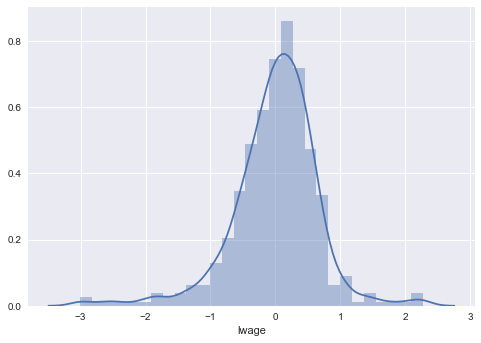

In [22]:
sns.distplot(res_lwage)
plt.show()

In [23]:
normaltest(res_lwage)

NormaltestResult(statistic=79.542467346437235, pvalue=5.3403863507048367e-18)

L'hypothèse nulle de normalité des résidus est rejetée au risque 5%.

### 9.	Tester l'hypothèse de non significativité de exper avec un seuil de significativité de 1%, 5% et 10% (test alternatif des deux côtés). Commentez les p-values.

In [24]:
ddl = (X_lwage.shape[0] - X_lwage.shape[1])
sig2 = np.dot(res_lwage.T, res_lwage) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X_lwage.T, X_lwage)))) 
t_exper = beta_lwage[3]/std[3]
print(t_exper)

3.45171828081


In [25]:
p_val = 2*t.sf(np.abs(t_exper), ddl)
print("p_value : ", p_val)

p_value :  0.000613365079014


In [26]:
t_student1 = t.ppf(1-0.01/2,df=df.shape[0]-7)
print("quantile de Student à 1% : ", t_student1)
t_student5 = t.ppf(1-0.05/2,df=df.shape[0]-7)
print("quantile de Student à 5% : ", t_student5)
t_student10 = t.ppf(1-0.1/2,df=df.shape[0]-7)
print("quantile de Student à 10% : ", t_student10)

quantile de Student à 1% :  2.58755757305
quantile de Student à 5% :  1.96561479201
quantile de Student à 10% :  1.64848105713


Les quantiles de student sont tous inférieurs à la statistique de test. On rejète pour les troix tests l'hypothèse nulle $H_0 : B_{exper} = 0$ 

### 10. Tester l’hypothèse que le coefficient associé à educ est égal à 10% avec un seuil de significativité de 5% (test à alternatif des deux côtés)

In [27]:
t_educ = beta_lwage[2]/std[2]
p_val = 2*t.sf(np.abs(t_educ), ddl)
print(t_educ)
print("p_value : ", p_val)
t_student5 = t.ppf(1-0.05/2,df=df.shape[0]-7)
print("Statistique de test à 5% : ", t_student5)

6.77056178537
p_value :  4.32452637615e-11
Statistique de test à 5% :  1.96561479201


### 11.	Tester l’hypothèse jointe que le rendement de l’éducation est de 10% et que celui de l’expérience professionnelle est de 5%.

In [29]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
beta_lwage, _, res_lwage, X_lwage = OLS(df, variables_explicatives=variables, variable_cible="lwage")

variables = ["city", "nwifeinc", "kidslt6", "kidsge6"]
beta_lwage_2, _, res_lwage_2, X_lwage_2 = OLS(df, variables_explicatives=variables, variable_cible="lwage")

In [37]:
SSR0 = np.dot(res_lwage.T, res_lwage)
SSR1 = np.dot(res_lwage_2.T, res_lwage_2)

ddl0 = X_lwage.shape[0]-X_lwage.shape[1]
ddl1 = X_lwage_2.shape[0]-X_lwage_2.shape[1]

F = ((SSR1 - SSR0)/SSR0) * (ddl0 / (ddl1 - ddl0))

In [38]:
print("Statistique F : ", F)
print("p-value : ", f.sf(F, ddl1-ddl0, ddl0))


Statistique F :  29.2323698336
p-value :  1.29449760424e-12


In [273]:
print("Quantile de Student :", f.ppf(0.95,2,df.shape[0]-7))

Quantile de Student : 3.01715065097


On rejette ainsi au risque 5%, l'hypothèse nulle. Selon le test, les deux coefficients sont significatifs.

### 12.	De combien augmente le salaire en pourcentage avec 10 années d’expérience ?

In [274]:
print("Avec 10 année d'expérience, le salaire augmentera, selon le modèle, \
de ", np.round(beta_lwage[3]*10*100, 2))

Avec 10 année d'expérience, le salaire augmentera, selon le modèle, de  15.49


### 13.	Tester l’égalité des coefficients associés aux variables kidsgt6 et kidslt6. Interprétez.

In [39]:
y = df["lwage"].as_matrix()
X = np.zeros((df.shape[0],7))
X[:,0] = 1
df_modify = df.ix[:, ["city","educ","exper","nwifeinc","kidslt6","kidsge6"]]
df_modify["tot_kids"] = df["kidslt6"] + df["kidsge6"]
X[:,1:] = df_modify.ix[:, ["city","educ","exper","nwifeinc","tot_kids", "kidslt6"]]

In [40]:
coef = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T,y))
list(map(lambda x: print(x),
    zip(["constante","city","educ","exper","nwifeinc","tot_kids", "kidslt6"], coef)))

('constante', -0.39897522667496688)
('city', 0.035267892932327793)
('educ', 0.10224754784018658)
('exper', 0.015487872095843347)
('nwifeinc', 0.0048826956815640173)
('tot_kids', -0.011703506704368927)
('kidslt6', -0.033599363677317307)


[None, None, None, None, None, None, None]

In [41]:
beta_totkids = coef[6]
y_pred = coef[0] + np.dot(X[:,1:], coef[1:])
res = y_pred - y
sig2 = np.dot(res.T,res) / (df.shape[0]-7)
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T,X))))

In [42]:
t_totkids = beta_totkids/ std[6]
print("Statistique de test : ", t_totkids)
p_val =  2.0 * (1.0 - t.cdf(np.abs(t_totkids), df.shape[0]-7))
print("P-value : ", p_val)

Statistique de test :  -0.37174737908
P-value :  0.710267974843


On rejette l'hypothèse nulle, les coefficients ne sont pas égaux au risque 5%. 

### 14.	En utilisant le modèle de la question 7, faire le test d'hétéroscédasticité de forme linéaire. Corriger le problème par rapport à la variable la plus importante en utilisant la méthode des MCG. Comparer les écarts-types des coefficients estimés avec ceux obtenus à la question 7. Commenter.

In [117]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]
X = df[variables]
X = np.zeros((X.shape[0], X.shape[1]+1))

X[:,0] = 1
X[:,1:] = df.ix[:, variables]
y_res = res_wage**2


In [118]:
beta_res = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y_res))

In [119]:
epsilon = np.dot(X, beta_res) - y_res
SSR1 = np.dot(epsilon.T, epsilon)

In [120]:
X_0 = np.zeros((X.shape[0], 1))
X_0[:,0] = 1

In [121]:
beta_res = np.dot(np.linalg.inv(np.dot(X_0.T, X_0)), np.dot(X_0.T, y_res))

In [122]:
epsilon = np.dot(X_0, beta_res) - y_res
SSR0 = np.dot(epsilon.T, epsilon)

In [123]:
beta_res

array([ 9.54162047])

In [124]:
ddl1 = X.shape[0]-X.shape[1]
ddl0 = X.shape[0]-1

F = ((SSR0 - SSR1)/SSR1) * (ddl1 / (ddl0 - ddl1))

In [125]:
print("p-value : ", f.sf(F, ddl0-ddl1, ddl1))
print("stat de test : ", f.ppf(0.95, ddl0-ddl1, ddl1))
print("fisher : ", F)

p-value :  0.147661333145
stat de test :  2.12011463029
fisher :  1.59261816202


On ne rejette pas l'hypothèse d'homoscédasticité mais on suppose l'hétéroscédasticité pour implémenter la méthode des MCG.

Pour trouver la variable la plus importante dans le modèle, on a deux solutions : 
- On peut centrer et réduire les variables et regarder le coefficient le plus grand en valeur absolue. 
- On peut faire une loi du Chi2 pour trouver la variable la plus significative.

On va procéder à la première solution : 

In [179]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]

beta, _, res, X = OLS(df, variables, "wage", centrer_reduire=True)

In [180]:
afficher_var(variables, beta)

4.17768154206 constante
0.177460801739 city
1.05015286667 educ
0.191667364826 exper
0.161274276206 nwifeinc
0.0141605373808 kidslt6
-0.0813492376709 kidsge6


La variable la plus importante dans le modèle est donc educ, qui a le coefficient associé le plus élevé.

In [181]:
beta, _, res, X = OLS(df, variables, "wage")
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 

In [182]:
print("ecart type des variables pour le modèle de la question 7 : ")
std

ecart type des variables pour le modèle de la question 7 : 


array([ 0.96349591,  0.32657023,  0.07027516,  0.02087998,  0.01549936,
        0.39697399,  0.12538399])

On remarque que si on centre-reduit les données, les écarts type sont déja relativement constant, donc nous sommes probablement dans une situation homoscédastique comme le suppose notre test préalable. 
On corrige à l'aide de la variable educ

In [190]:
beta, _, res_1, X_1 = OLS(df/np.std(df["educ"]), variables, "wage")

In [191]:
ddl = (X_1.shape[0] - X_1.shape[1])
sig2 = np.dot(res_1.T, res_1) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X_1.T, X_1)))) 

In [192]:
print("ecart type des variables pour le modèle corigé : ")
std

ecart type des variables pour le modèle corigé : 


array([ 0.42208529,  0.32657023,  0.07027516,  0.02087998,  0.01549936,
        0.39697399,  0.12538399])

On remarque qu'en divisant par l'écart type de la variable la plus importante, l'écart-type des coefficients semblent très différents les uns des autres. Cela peut nous donner un indice sur l'hétéroscédasticité.

### 15.	Tester le changement de structure de la question 8 entre les femmes qui ont plus de 43 ans et les autres : test sur l'ensemble des coefficients. Refaire le test avec 3 groupes (mutuellement exclusifs) : les femmes de moins de 30 ans, entre 30 et 43 ans, plus de 43 ans

On va comparer 3 modèles :

In [59]:
variables = ["city", "educ", "exper", "nwifeinc", "kidslt6", "kidsge6"]


In [60]:
beta_0, _, res_0, X_0 = OLS(df, variables, "lwage")
beta_g43, _, res_g43, X_g43 = OLS(df[df["age"]>43], variables, "lwage")
beta_le43, _, res_le43, X_le43 = OLS(df[df["age"]<=43], variables, "lwage")

In [61]:
SSR = np.dot(res_0.T, res_0)
ddl = X_0.shape[0]-X_0.shape[1]

SSR1 = np.dot(res_g43.T, res_g43)
ddl1 = X_g43.shape[0]-X_g43.shape[1]

SSR2 = np.dot(res_le43.T, res_le43)
ddl2 = X_le43.shape[0]-X_le43.shape[1]

F = ((SSR - (SSR1+SSR2))/(SSR1+SSR2)) * ((ddl1+ddl2) / (ddl - (ddl1+ddl2)))

In [62]:
print("p-value : ", f.sf(F, (ddl - (ddl1+ddl2)), (ddl1+ddl2)))
print("stat de test : ", f.ppf(0.95, (ddl - (ddl1+ddl2)), (ddl1+ddl2)))
print("fisher : ", F)

p-value :  0.566036445033
stat de test :  2.03170228032
fisher :  0.826037485276


In [63]:
X_0.shape[1]

7

On ne rejette pas H0, le changement de structure n'est pas justifié

In [64]:
beta_0, _, res_0, X_0 = OLS(df, variables, "wage")
beta_le30, _, res_le30, X_le30 = OLS(df[df["age"]<=30], variables, "wage")
beta_g30le43, _, res_g30le43, X_g30le43 = OLS(\
                            df[(df["age"]>30) & (df["age"]<=43)], variables, "wage")
beta_g43, _, res_g43, X_g43 = OLS(df[df["age"]>43], variables, "wage")


In [65]:
SSR = np.dot(res_0.T, res_0)
ddl = X_0.shape[0]-X_0.shape[1]

SSR1 = np.dot(res_le30.T, res_le30)
ddl1 = X_le30.shape[0]-X_le30.shape[1]

SSR2 = np.dot(res_g30le43.T, res_g30le43)
ddl2 = X_g30le43.shape[0]-X_g30le43.shape[1]

SSR3 = np.dot(res_g43.T, res_g43)
ddl3 = X_g43.shape[0]-X_g43.shape[1]


F = ((SSR - (SSR1+SSR2+SSR3))/(SSR1+SSR2+SSR3)) * ((ddl1+ddl2+ddl3) / (ddl - (ddl1+ddl2+ddl3)))

In [66]:
(ddl1+ddl2+ddl3)

407

In [67]:
print("p-value : ", f.sf(F, (ddl - (ddl1+ddl2+ddl3)), (ddl1+ddl2+ddl3)))
print("stat de test : ", f.ppf(0.95, (ddl - (ddl1+ddl2+ddl3)), (ddl1+ddl2+ddl3)))
print("fisher : ", F)

p-value :  0.880918612154
stat de test :  1.71613078495
fisher :  0.580018514709


On ne rejette pas $H_0$

### 16.	A partir de la variable kidslt6, créer un ensemble de variables binaires pour le nombre d’enfants de moins de 6 ans. Refaire la question 8 avec ces variables et en utilisant comme référence les femmes qui ont des enfants de plus de 6 ans. Ces catégories sont-elles mutuellement exclusives ? Interprétez les paramètres associés aux variables binaires. Faire le test de non significativité de l’ensemble des variables binaires.

In [68]:
df["0_kidslt6"] = df["kidslt6"].map(lambda x : 1 if x==0 else 0)
df["1_kidslt6"] = df["kidslt6"].map(lambda x : 1 if x==1 else 0)
df["2_kidslt6"] = df["kidslt6"].map(lambda x : 1 if x==2 else 0)

In [69]:
print(df["0_kidslt6"].sum(), df["1_kidslt6"].sum(), df["2_kidslt6"].sum())

375 46 7


In [70]:
df[["0_kidslt6", "1_kidslt6", "2_kidslt6", "lwage"]].corr()

,0_kidslt6,1_kidslt6,2_kidslt6,lwage
0_kidslt6,1.000000,-0.923049,-0.342993,0.026992
1_kidslt6,-0.923049,1.000000,-0.044746,-0.034018
2_kidslt6,-0.342993,-0.044746,1.000000,0.012970
lwage,0.026992,-0.034018,0.012970,1.000000


On vire la variable la moins corrélé : 2

Les variables catégorielles sont par définition mutuellement exclusives.

In [71]:
variables = ["city", "educ", "exper", "nwifeinc", "kidsge6", "0_kidslt6", "1_kidslt6"]
beta, _, res, X = OLS(df, variables, "lwage")
afficher_var(variables, beta)

-0.462578680318 constante
0.0346091850583 city
0.1022193931 educ
0.0154368855084 exper
0.00490326238684 nwifeinc
-0.0115937326435 kidsge6
0.065028157273 0_kidslt6
0.0109985415938 1_kidslt6


Selon l'étude des coefficients, on s'apperçoit que ne pas avoir d'enfants augmente le salaire de 6.5% versus le fait d'avoir 2 enfants.


In [72]:
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 
t_0 = beta[6]/std[6]
t_1 = beta[7]/std[7]

print(t_0,t_1)

0.251511104127 0.0401462492397


In [73]:
p_val = 2*t.sf(np.abs(t_0), ddl)
print("p_value pour la variable des femmes qui n'ont pas d'enfant : ", p_val)

p_val = 2*t.sf(np.abs(t_1), ddl)
print("p_value pour la variable des femmes qui ont 1 enfant : ", p_val)

p_value pour la variable des femmes qui n'ont pas d'enfant :  0.80154199217
p_value pour la variable des femmes qui ont 1 enfant :  0.967995606294


In [74]:
t_student1 = t.ppf(1-0.05/2,df=df.shape[0]-7)
print("quantile de Student à 5% : ", t_student1)

quantile de Student à 5% :  1.96561479201


On ne rejette pas l'hypothèse de non significativé des deux coefficients au risque 5% 

### 17.	Créer une variable binaire pour les femmes qui ont des enfants de moins de 2 ans. Créer un terme d’interaction entre le nombre d’enfants de moins deux ans et l’éducation. Faire la régression de lwage sur une constante, city, educ, exper, nwifeinc,  et ces deux dernières variables. Faire le test de significativité du terme d’interaction. Interpréter.

Il n'existe pas de variables "nombre d'enfants de moins de 2 ans". Nous allons répondre à la question en utilisant la variable du nombre d'enfants de moins de 6 ans.

In [75]:
df["binary_kidslt6"] = df["kidslt6"].map(lambda x : 0 if x==0 else 1)
df["interaction_kids_educ"] = df["kidslt6"]*df["educ"]

In [76]:
variables = ["city", "educ", "exper", "nwifeinc", "interaction_kids_educ", "binary_kidslt6"]
beta, _, res, X = OLS(df, variables, "lwage")
afficher_var(variables, beta)

-0.424354866265 constante
0.0358907209438 city
0.102316977318 educ
0.0161213459309 exper
0.00492265840253 nwifeinc
0.00268372791065 interaction_kids_educ
-0.098055935251 binary_kidslt6


In [77]:
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 
t_0 = beta[5]/std[5]

print(t_0)

0.166444999737


In [78]:
p_val = 2*t.sf(np.abs(t_0), ddl)
print("p_value pour la variable d'interaction : ", p_val)


p_value pour la variable d'interaction :  0.867886670921


la variable n'est pas significative, on rejette l'interaction entre les deux variables ce qui signifie que l'effet de l'éducation ne diffère pas selon la valeur prise par le nombre d'enfants de moins de 6 ans.

## Partie 2. Séries temporelles 1

### 1.	Ouvrir le fichier volat.raw; importer les données sur matlab en recodant les valeurs manquantes en -9999.

In [79]:

    
    
names = [
    "date", #                    1947.01 to 1993.06
    "sp500", #                   S&P 500 index
    "divyld",  #                 dividend yield, annualized rate
    "i3",      #                 3 mo. T-bill annualized rate
    "ip",      #                 index of industrial production
    "pcsp",    #                 pct chg, sp500, ann rate
    "rsp500",  #                 return on sp500: pcsp + divyld
    "pcip",    #                 pct chg, IP, ann. rate
    "ci3",     #                 i3 - i3[t-1]
    "ci3_1",   #                 ci3[t-1]
    "ci3_2",   #                 ci3[t-2]
    "pcip_1",  #                 pcip[t-1]
    "pcip_2",  #                 pcip[t-2]
    "pcip_3",  #                 pcip[t-3]
    "pcsp_1",  #                 pcip[t-1]
    "pcsp_2",  #                 pcip[t-2
    "pcsp_3"  #                 pcip[t-3]
]
#chemin_alex = "/media/brehelin/0FECCBDE10E4BE99/Projet économétrie/textfiles/VOLAT.raw"
#df = pd.read_csv(chemin_alex, sep='\s+', names=names)
df = pd.read_csv('swbook1_3e\\textfiles\VOLAT.raw', sep='\s+', names=names)
df = df.convert_objects(convert_numeric=True)
df = df.fillna(-9999)

### 2.	Pourquoi doit-on stationnariser les séries ?

Parce que nous ne savons pas modéliser des séries non stationnaires.
Sous l'hypothèse de stationnarité le MCO est le meilleur estimateur non biaisé.

### 3.	Faire le test de racine unitaire de log(sp500), de pcsp de div

$$ H_0 = Les \ données \ ont \ une \ racine \ unitaire,\ donc \ processus \ non \ stationnaire $$
$$ H_1 = Les \ données \ n'ont \ pas \ de \ racine \ unitaire, \ donc \ processus \ stationnaire $$

In [80]:
df.head()

,date,sp500,divyld,i3,ip,pcsp,rsp500,pcip,ci3,ci3_1,ci3_2,pcip_1,pcip_2,pcip_3,pcsp_1,pcsp_2,pcsp_3
0,1947.01,15.21,4.49,0.38,22.4,-9999.00000,-9999.00000,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000
1,1947.02,15.80,4.38,0.38,22.5,46.54833,50.92833,5.357163,0.0,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000
2,1947.03,15.16,4.61,0.38,22.6,-48.60762,-43.99762,5.333354,0.0,0.0,-9999.0,5.357163,-9999.000000,-9999.000000,46.54833,-9999.00000,-9999.00000
3,1947.04,14.60,4.75,0.38,22.5,-44.32714,-39.57714,-5.309754,0.0,0.0,0.0,5.333354,5.357163,-9999.000000,-48.60762,46.54833,-9999.00000
4,1947.05,14.34,5.05,0.38,22.6,-21.36988,-16.31988,5.333354,0.0,0.0,0.0,-5.309754,5.333354,5.357163,-44.32714,-48.60762,46.54833


* Log(SP500)

In [81]:
#df["y_lag"] = np.nan
#df.ix[1:, "y_lag"] = df[""]
df_sp = df.copy()
df_sp["log_sp500"] = np.log(df_sp["sp500"])
df_sp["y_lag"] = df_sp["log_sp500"].shift(1)
df_sp = df_sp.iloc[1:,:]

In [82]:
df_sp["delta_y"] = df_sp["log_sp500"] - df_sp["y_lag"]

In [83]:
variables = ["y_lag"]
beta, _, res, X = OLS(df_sp, variables, "delta_y")
afficher_var(variables, beta)

0.00963858554346 constante
-0.000807100663185 y_lag


In [84]:
# Test racine unitaire
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 
t_0 = beta[1]/std[1]
print("Statistique de test : ", t_0)

Statistique de test :  -0.489970585303


In [85]:
pvalue = mackinnonp(t_0, regression='c', N=1)
print("p-value du test de dickey-fuller : ", pvalue)
critvalues = mackinnoncrit(N=1, regression='c', nobs=X.shape[0])
critvalues = {"1%" : critvalues[0], "5%" : critvalues[1],
              "10%" : critvalues[2]}

print("Valeur critique de mackinnon : ", critvalues)

p-value du test de dickey-fuller :  0.893958854311
Valeur critique de mackinnon :  {'1%': -3.4421447800270673, '5%': -2.8667429272780858, '10%': -2.5695409929766093}


On ne peut pas rejetter H0, il est donc probable à 5% que notre série soit non stationnaire

* pcsp

In [86]:
df_pcsp = df.copy()
df_pcsp["y_lag"] = df_pcsp["pcsp"].shift(1)
# On part de la ligne 2 car la valeur est manquante en 0
df_pcsp = df_pcsp.iloc[2:,:]
df_pcsp["delta_y"] = df_pcsp["pcsp"] - df_pcsp["y_lag"]

In [87]:
variables = ["y_lag"]
beta, _, res, X = OLS(df_pcsp, variables, "delta_y")
afficher_var(variables, beta)

5.99377755776 constante
-0.758787766093 y_lag


In [88]:
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 
t_0 = beta[1]/std[1]
print("Statistique de test : ", t_0)

Statistique de test :  -18.4192564801


In [89]:
pvalue = mackinnonp(t_0, regression='c', N=1)
print("p-value du test de dickey-fuller : ", pvalue)
critvalues = mackinnoncrit(N=1, regression='c', nobs=X.shape[0])
critvalues = {"1%" : critvalues[0], "5%" : critvalues[1],
              "10%" : critvalues[2]}

print("Valeur critique de mackinnon : ", critvalues)

p-value du test de dickey-fuller :  2.17767343796e-30
Valeur critique de mackinnon :  {'1%': -3.4421660928041633, '5%': -2.8667523104859627, '10%': -2.5695459930904199}


Ici on rejette H0, donc au risque 5% on peut dire que notre série est stationnaire

* div

In [90]:
df_div = df.copy()
df_div["y_lag"] = df_div["divyld"].shift(1)
df_div = df_div.iloc[1:,:]
df_div["delta_y"] = df_div["divyld"] - df_div["y_lag"]

In [91]:
variables = ["y_lag"]
beta, _, res, X = OLS(df_div, variables, "delta_y")
afficher_var(variables, beta)

0.038169486737 constante
-0.00990860578459 y_lag


In [92]:
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 
t_0 = beta[1]/std[1]
print("Statistique de test : ", t_0)

Statistique de test :  -1.56549185688


In [93]:
pvalue = mackinnonp(t_0, regression='c', N=1)
print("p-value du test de dickey-fuller : ", pvalue)
critvalues = mackinnoncrit(N=1, regression='c', nobs=X.shape[0])
critvalues = {"1%" : critvalues[0], "5%" : critvalues[1],
              "10%" : critvalues[2]}

print("Valeur critique de mackinnon : ", critvalues)

p-value du test de dickey-fuller :  0.500901099077
Valeur critique de mackinnon :  {'1%': -3.4421447800270673, '5%': -2.8667429272780858, '10%': -2.5695409929766093}


Au risque 5%, on ne rejette pas l'hypothèse que notre série est non stationnaire

### 4. Interpréter l'autocorrélogramme et l'autocorrélogrammes partiels de pcsp et de div. Quelle est la différence entre ces deux graphiques ?

pcsp

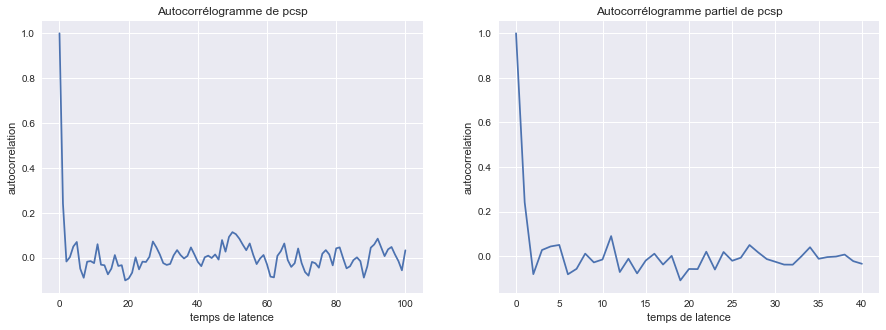

In [94]:
y = df_sp["pcsp"]
_, axarr = plt.subplots(1, 2, figsize=(15,5))

axarr[0].plot(acf(y, nlags=100))
axarr[0].set_title("Autocorrélogramme de pcsp")
axarr[0].set_xlabel("temps de latence")
axarr[0].set_ylabel("autocorrelation")

axarr[1].plot(pacf(y))
axarr[1].set_title("Autocorrélogramme partiel de pcsp")
axarr[1].set_xlabel("temps de latence")
axarr[1].set_ylabel("autocorrelation")

plt.show()

div

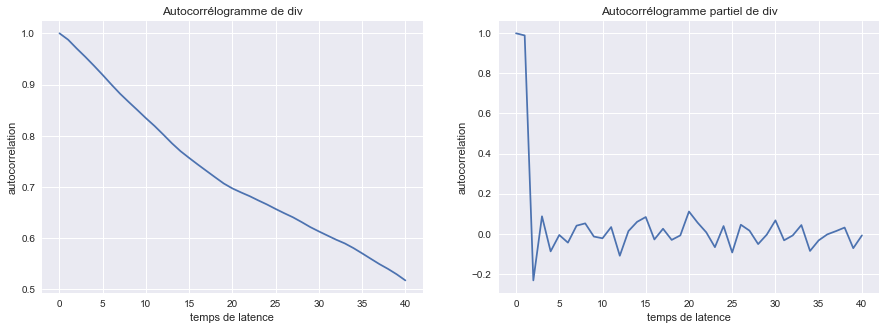

In [95]:
y = df_sp["divyld"] 
_, axarr = plt.subplots(1, 2, figsize=(15,5))

axarr[0].plot(acf(y))
axarr[0].set_title("Autocorrélogramme de div")
axarr[0].set_xlabel("temps de latence")
axarr[0].set_ylabel("autocorrelation")

axarr[1].plot(pacf(y))
axarr[1].set_title("Autocorrélogramme partiel de div")
axarr[1].set_xlabel("temps de latence")
axarr[1].set_ylabel("autocorrelation")

plt.show()

AR : L'ACF décroit rapidement vers 0, regarder PACF pour le nombre de retards significatifs.  
MA : PACF tend rapidement vers 0, regarder ACF pour trouver nombre de retards significatifs.  
ARMA : Ni l'ACF ni la PACF ne tend vers 0.  

* PCSP : autocorrélogramme tend rapidement vers 0, il s'agit probablement d'un processus AR, selon l'autocorrélogramme partiel le nombre de retard significatif se situe en 1 et 5.
* DIV : L'ACF ne tend pas rapîdement vers 0, par ailleurs la pacf tend elle rapidement vers 0, on peut supposer que la série peut être modéliser par un processus MA .

### 5. Proposer une modélisation AR(p) d’une série de votre choix, en utilisant tous les outils vus au cours.

* Etape 1 : Définir si la série est stationnaire
* Etape 2 : Déterminer le type de processus 
* Etape 3 : Déterminer le nombre de retard (avec AIC/BIC)
* Etape 4 : Calcul des coéfficients
* Etape 5 : tests

On choisit de modéliser la série PCSP avec un modèle de type AR(p) puisque la série est déja stationnaire d'après le test de fuller, et quel celle-ci suit un modèle de type AR d'après l'autocorrélogramme. 
On cherche le p optimal, et ensuite on estime.

In [96]:
df.head()

,date,sp500,divyld,i3,ip,pcsp,rsp500,pcip,ci3,ci3_1,ci3_2,pcip_1,pcip_2,pcip_3,pcsp_1,pcsp_2,pcsp_3
0,1947.01,15.21,4.49,0.38,22.4,-9999.00000,-9999.00000,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000
1,1947.02,15.80,4.38,0.38,22.5,46.54833,50.92833,5.357163,0.0,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.00000,-9999.00000,-9999.00000
2,1947.03,15.16,4.61,0.38,22.6,-48.60762,-43.99762,5.333354,0.0,0.0,-9999.0,5.357163,-9999.000000,-9999.000000,46.54833,-9999.00000,-9999.00000
3,1947.04,14.60,4.75,0.38,22.5,-44.32714,-39.57714,-5.309754,0.0,0.0,0.0,5.333354,5.357163,-9999.000000,-48.60762,46.54833,-9999.00000
4,1947.05,14.34,5.05,0.38,22.6,-21.36988,-16.31988,5.333354,0.0,0.0,0.0,-5.309754,5.333354,5.357163,-44.32714,-48.60762,46.54833


In [97]:
AIC = []
for p in range(1,6):
    
    dftemp = df.copy()

    dftemp["y_lag1"] = dftemp["pcsp"].shift(1)
    dftemp = dftemp.iloc[2:,:]
    
    variables = ["y_lag1"]

    for i in range(2, p+1):
        dftemp["y_lag"+str(i)] = dftemp["y_lag"+str(i-1)].shift(1)
        dftemp = dftemp.iloc[1:,:]
        variables.append("y_lag"+str(i))
    beta, y, res, X = OLS(dftemp, variables, "pcsp")

    sig2 = np.dot(res.T, res)/(X.shape[0]-X.shape[1])
    
    AIC.append(np.log(sig2) + (2.*(p+1))/X.shape[0])

In [98]:
AIC

[7.3430958715397061,
 7.3386363627163815,
 7.3437164963304253,
 7.3485255129679183,
 7.3516079121866005]

On prend le paramètre p qui engendre la plus petite AIC. C'est à dire p=2

**Remarque :** On utilise une modélisation comprenant une constante.

On teste avec statsmodel. Les résultats sont équivalents : 

In [99]:
ar_model = AR(list(dftemp["pcsp"]))
params = ar_model.fit(5, ic='aic', trend='c').params
print((params)) #y compris la constante

[ 6.56025043  0.26118615 -0.07407557]


In [100]:
variables = ["y_lag1", "y_lag2"]
beta, y, res, X = OLS(dftemp.iloc[2:,:], variables, "pcsp")
afficher_var(variables, beta)

6.56025042877 constante
0.261186146766 y_lag1
-0.0740755696406 y_lag2


### 6. Faire des prévisions pour T+1, T+2, T+3 en utilisant le modèle AR(p) de question 5. Calculer les RMSE.

In [101]:
variables = ["y_lag1", "y_lag2"]
beta, y, res, X = OLS(dftemp.iloc[2:,:-3], variables, "pcsp")

X = np.zeros((dftemp.shape[0], 3))
X[:,0] = 1
X[:,1:] = dftemp.ix[:, variables]

y_pred = np.dot(X, beta)
RMSE = np.sqrt(np.sum(y_pred[-3:]-dftemp["pcsp"][-3:])**2)

print("RMSE pour les 3 dernières observations: ", RMSE)
   

RMSE pour les 3 dernières observations:  26.0864550541


## Partie 2. Séries temporelles 2

### 1. Ouvrir le fichier Faire une régression de i3 sur inf_1, inf_2, inf_3 et def_1, def_2, def_3 où x_i représente la variable x laggée de i périodes. Calculer l’impact à 1, 2 et 3 périodes de inf et def sur i3. Calculer les impacts à long terme ; commentez

In [5]:
    
names = [
  "year",                     #1948-2003
  "i3",                       #3 mo. T bill rate
  "inf" ,                     #CPI inflation rate
  "rec",                      #federal receipts, % GDP
  "out" ,                     #federal outlays, % GDP
  "def",                      #out - rec (deficit as % GDP)
  "i3_1",                     #i3[t-1]
  "inf_1" ,                   #inf[t-1]
  "def_1",                    #def[t-1]
  "ci3",                      #i3 - i3_1 
   "cinf",                    #inf - inf_1
   "cdef",                    #def - def_1
   "y77"   
]
#chemin_alex = "/media/brehelin/0FECCBDE10E4BE99/Projet économétrie/textfiles/intdef.raw"
#df = pd.read_csv(chemin_alex, sep='\s+', names=names)
df = pd.read_csv('swbook1_3e\\textfiles\\intdef.raw', sep='\s+', names=names)
df = df.convert_objects(convert_numeric=True)

In [6]:
df.head()

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
0,1948,1.04,8.1,16.2,11.6,-4.600000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1949,1.10,-1.2,14.5,14.3,-0.200000,1.04,8.1,-4.600000,0.06,-9.3,4.400001,0
2,1950,1.22,1.3,14.4,15.6,1.200001,1.10,-1.2,-0.200000,0.12,2.5,1.400001,0
3,1951,1.55,7.9,16.1,14.2,-1.900001,1.22,1.3,1.200001,0.33,6.6,-3.100001,0
4,1952,1.77,1.9,19.0,19.4,0.400000,1.55,7.9,-1.900001,0.22,-6.0,2.300000,0


In [7]:
df["inf_2"] = df["inf_1"].shift(1)
df["inf_3"] = df["inf_2"].shift(1)
df["def_2"] = df["def_1"].shift(1)
df["def_3"] = df["def_2"].shift(1)

In [8]:
df = df.ix[ 4:,:]
print(df.shape)

(52, 17)


In [9]:
variables = ["inf_1", "inf_2", "inf_3"]
beta, _, res, X = OLS(df, variables, "i3")
afficher_var(variables, beta)
print("Impact multiplier of order 1 : ", beta[1])
print("Impact multiplier of order 2 : ", beta[1:3].sum())
print("Long Run Propensity (LRP) : ", beta[1:].sum())

2.05291684226 constante
0.585407921662 inf_1
-0.153967456752 inf_2
0.364301715485 inf_3
Impact multiplier of order 1 :  0.585407921662
Impact multiplier of order 2 :  0.431440464911
Long Run Propensity (LRP) :  0.795742180396


Il y'a un impact positif sur la période 1 & 3. L'impact de la période 2 est négatif

In [10]:
variables = ["def_1", "def_2", "def_3"]
beta, _, res, X = OLS(df, variables, "i3")
afficher_var(variables, beta)
print("Impact multiplier of order 1 : ", beta[1])
print("Impact multiplier of order 2 : ", beta[1:3].sum())
print("Long Run Propensity (LRP) : ", beta[1:].sum())

3.73446521301 constante
0.214182321806 def_1
0.162621050661 def_2
0.462825277256 def_3
Impact multiplier of order 1 :  0.214182321806
Impact multiplier of order 2 :  0.376803372467
Long Run Propensity (LRP) :  0.839628649724


Les 3 périodes ont un impact positif, avec le plus important sur la 3ème période

In [11]:
# test la significativité de long terme
df_test = df.ix[:, ["i3", "def","def_1", "def_2", "def_3"]]
df_test["def_1_minus"] = df_test["def_1"] - df_test["def"]
df_test["def_2_minus"] = df_test["def_2"] - df_test["def"]
df_test["def_3_minus"] = df_test["def_3"] - df_test["def"]

In [12]:
variables = ["def", "def_1_minus", "def_2_minus", "def_3_minus"]
beta, _, res, X = OLS(df_test, variables, "i3")
afficher_var(variables, beta)
ddl = (X.shape[0] - X.shape[1])
sig2 = np.dot(res.T, res) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(X.T, X)))) 
t_0 = beta[1]/std[1]
print("Statistique de test : ", t_0)
p_val = 2*t.sf(np.abs(t_0), ddl)
print("p_value du test : ", p_val)

3.67031062767 constante
0.869905740215 def
0.120970155159 def_1_minus
0.17823871774 def_2_minus
0.452587520031 def_3_minus
Statistique de test :  4.17409655976
p_value du test :  0.000128233822959


On peut rejetter l'hypothèse nulle, et affirmer au risque 5% que le risque de long terme est significatif

### 2. Tester l’auto-corrélation des erreurs

In [110]:
# Dans le cas de regression de I3 sur inf
variables = ["inf_1", "inf_2", "inf_3"]
beta, _, res, X = OLS(df, variables, "i3")

u_ = res[1:,]
u_ = u_.values.reshape((51,1))
lag_u = res.shift(1)[1:]
lag_u = lag_u.values.reshape((51,1))
rho = np.dot(np.linalg.inv(np.dot(lag_u.T, lag_u)), np.dot(lag_u.T, u_))
u_new = u_-lag_u*rho

ddl = (u_.shape[0] - 1)
sig2 = np.dot(u_new.T, u_new) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(lag_u.T, lag_u)))) 
t_0 = rho[0]/ std[0]
print("Statistique de test : ", t_0[0])
p_val = 2*t.sf(np.abs(t_0), ddl)
print("p_value : ", p_val[0])

Statistique de test :  4.02987635693
p_value :  0.000190112023963


On rejette H0, il y'a donc une autocorrélation des erreurs au risque 5%

In [111]:
# Dans le cas de regression de I3 sur inf
variables = ["def_1", "def_2", "def_3"]
beta, _, res, X = OLS(df, variables, "i3")

u_ = res[1:,]
u_ = u_.values.reshape((51,1))
lag_u = res.shift(1)[1:]
lag_u = lag_u.values.reshape((51,1))
rho = np.dot(np.linalg.inv(np.dot(lag_u.T, lag_u)), np.dot(lag_u.T, u_))
u_new = u_-lag_u*rho

ddl = (u_.shape[0] - 1)
sig2 = np.dot(u_new.T, u_new) / ddl
std = np.sqrt(np.diag(sig2*np.linalg.inv(np.dot(lag_u.T, lag_u)))) 
t_0 = rho[0]/ std[0]
print("Statistique de test : ", t_0[0])
p_val = 2*t.sf(np.abs(t_0), ddl)
print("p_value : ", p_val[0])

Statistique de test :  9.27362732974
p_value :  1.90913202255e-12


On rejette H0, il y'a donc une autocorrélation des erreurs au risque 5%

### 3. Tester l’hypothèse que les valeurs passées de inf n’ont pas d’impact sur i3.

In [13]:
# modèle non contraint
variables = ["inf_1", "inf_2", "inf_3"]
beta, _, res, X = OLS(df, variables, "i3")

ssr0 = res.dot(res)
ddl0 = X.shape[0] - X.shape[1]
# modèle contraint
beta, _, res, X = OLS(df, [], "i3")
ssr1 = res.dot(res)
ddl1 = X.shape[0] - X.shape[1]

F = ((ssr1-ssr0)/ssr0)*(ddl0/(ddl1-ddl0))


print("p-value : ", f.sf(F, (ddl1-ddl0), ddl0))
print("valeur critique du test : ", f.ppf(0.95, (ddl1-ddl0), ddl0))
print("fisher : ", F)

p-value :  7.37190803531e-09
valeur critique du test :  2.79806063544
fisher :  21.098121403


Le test réalisé se rapproche du test de causalité de granger puisque l'on a :
$$ Y_{t} = c + X_{t-1} + X_{t-2} + X_{t-3} + \epsilon $$
et que l'on souhaite tester l'impact de X sur Y. 
Par ailleurs dans le test de granger on a une équation de la forme 
$$ Y_{t} = c + \sum{X_{t-i}} + \sum{Y_{t-i}} + \epsilon $$

On réalise donc la même procédure qu'un test de granger avec notre équation avec les hypothèses :
    $$ H_{0} : \beta_{1} = \beta_{2} = \beta_{3} = 0 $$
    $$ H_{0} : H_{0} \ n'est \ pas  \ vrai $$
On rejette H0, les coefficients dynamiques semble significatifs au risque 5% dans le cas de restrictions multiples.
La combinaison des 3 retards sur la variable Y au temps t serait donc significative.
Au sens de granger, il y'a donc un effet causal de X sur Y, donc un impact des retards sur Y